In [1]:
import networkx as nx
%matplotlib inline 
import pandas as pd

In [15]:
# bipartite demo - create network from list
from networkx.algorithms import bipartite 

B = nx.Graph()
B.add_nodes_from(['Harry Potter', 'Ron Weasley', 'Draco Malfoy', 'Neville Longbottom'], bipartite = 0)
B.add_nodes_from(['Dark Arts', 'Defence Against the Dark Arts', 'Herbology', 'Flying'], bipartite = 1)

B.add_edges_from([('Dark Arts', 'Draco Malfoy'), ('Defence Against the Dark Arts', 'Harry Potter'), ('Defence Against the Dark Arts', 'Ron Weasley'), ('Defence Against the Dark Arts', 'Neville Longbottom'), ('Herbology', 'Neville Longbottom'), ('Herbology', 'Ron Weasley'), ('Flying', 'Harry Potter'), ('Flying', 'Ron Weasley'), ('Flying', 'Draco Malfoy'), ('Flying', 'Neville Longbottom')])

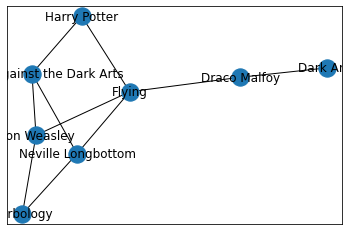

In [16]:
# show 

nx.draw_networkx(B)

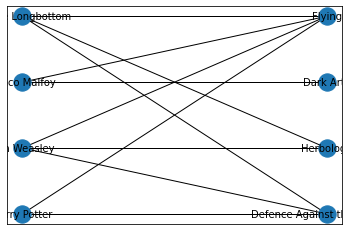

In [17]:
students, classes = bipartite.sets(B)
pos = dict()
pos.update( (n, (0, i)) for i, n in enumerate(students) ) # put nodes from students at x=0
pos.update( (n, (1, i)) for i, n in enumerate(classes) ) # put nodes from Y at classes=1

nx.draw_networkx(B, pos=pos, font_size=10)

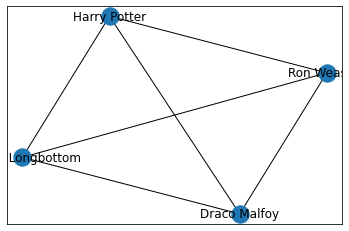

In [18]:
# project on students

L = bipartite.projected_graph(B, students) 
nx.draw_networkx(L)

In [19]:
# whighted projected graph

L = bipartite.weighted_projected_graph(B, students)
L.edges(data=True) 

EdgeDataView([('Harry Potter', 'Ron Weasley', {'weight': 2}), ('Harry Potter', 'Draco Malfoy', {'weight': 1}), ('Harry Potter', 'Neville Longbottom', {'weight': 2}), ('Ron Weasley', 'Draco Malfoy', {'weight': 1}), ('Ron Weasley', 'Neville Longbottom', {'weight': 3}), ('Draco Malfoy', 'Neville Longbottom', {'weight': 1})])

In [20]:
# project on classes

L = bipartite.weighted_projected_graph(B, classes)
L.edges(data=True) 

EdgeDataView([('Defence Against the Dark Arts', 'Herbology', {'weight': 2}), ('Defence Against the Dark Arts', 'Flying', {'weight': 3}), ('Herbology', 'Flying', {'weight': 2}), ('Dark Arts', 'Flying', {'weight': 1})])

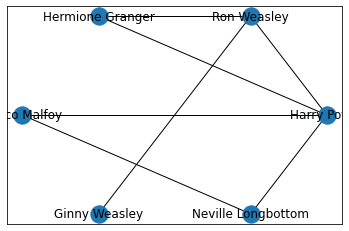

In [107]:
# 9.5.2 - Clustering 

G = nx.read_edgelist('edges_list_pos_weight.txt', delimiter=',', data = [('weight', int)]) 
nx.draw_networkx(G, nx.circular_layout(G))

In [108]:
# clustering index of each node 

print('Harry Potter: ', nx.clustering(G, 'Harry Potter')) 
print('Hermione Granger: ', nx.clustering(G, 'Hermione Granger')) 
print('Ron Weasley: ', nx.clustering(G, 'Ron Weasley')) 
print('Ginny Weasley: ', nx.clustering(G, 'Ginny Weasley')) 
print('Neville Longbottom: ', nx.clustering(G, 'Neville Longbottom')) 
print('Draco Malfoy: ', nx.clustering(G, 'Draco Malfoy')) 

Harry Potter:  0.3333333333333333
Hermione Granger:  1.0
Ron Weasley:  0.3333333333333333
Ginny Weasley:  0
Neville Longbottom:  1.0
Draco Malfoy:  1.0


In [109]:
# clustering index of the netrork

print(nx.average_clustering(G)) 

0.611111111111111


In [110]:
# transitivity index of the netrork

print(nx.transitivity(G)) 

0.5


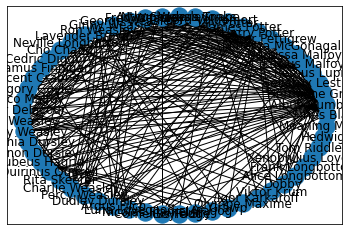

In [111]:
# create (again) from csv 
G1_df = pd.read_csv('cleanRelations.csv', delimiter=',')
G1 = nx.from_pandas_edgelist(G1_df, 'name1', 'name2', edge_attr='relation')

nx.draw_networkx(G1, nx.circular_layout(G1))

In [112]:
print(nx.average_clustering(G1)) 
print(nx.transitivity(G1)) 

0.6300075556192183
0.4509884678747941


In [113]:
# 9.5.3 - Distance

# paths

print(sorted(nx.all_simple_paths(G, 'Harry Potter', 'Ginny Weasley'))) 

[['Harry Potter', 'Hermione Granger', 'Ron Weasley', 'Ginny Weasley'], ['Harry Potter', 'Ron Weasley', 'Ginny Weasley']]


In [114]:
# path's length

print(nx.shortest_path(G, 'Harry Potter', 'Ginny Weasley'))
print(nx.shortest_path_length(G, 'Harry Potter', 'Ginny Weasley'))

['Harry Potter', 'Ron Weasley', 'Ginny Weasley']
2


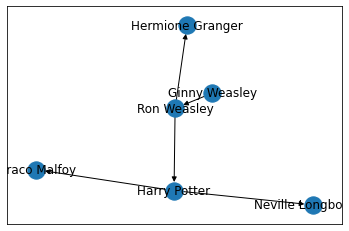

In [121]:
# BFS - from a specific node\

T = nx.bfs_tree(G, 'Ginny Weasley')
nx.draw_networkx(T)

In [116]:
# all shortest paths from a specific node to all connected nodes
print(nx.shortest_path(G, 'Ginny Weasley')) 

{'Ginny Weasley': ['Ginny Weasley'], 'Ron Weasley': ['Ginny Weasley', 'Ron Weasley'], 'Harry Potter': ['Ginny Weasley', 'Ron Weasley', 'Harry Potter'], 'Hermione Granger': ['Ginny Weasley', 'Ron Weasley', 'Hermione Granger'], 'Draco Malfoy': ['Ginny Weasley', 'Ron Weasley', 'Harry Potter', 'Draco Malfoy'], 'Neville Longbottom': ['Ginny Weasley', 'Ron Weasley', 'Harry Potter', 'Neville Longbottom']}


In [117]:
# shortest weighted path
print(nx.shortest_path_length(G, 'Ginny Weasley', weight='weight'))

{'Ginny Weasley': 0, 'Ron Weasley': 4, 'Hermione Granger': 12, 'Harry Potter': 14, 'Neville Longbottom': 17, 'Draco Malfoy': 19}


In [119]:
# network globar distance

# average shortest path length

print(nx.average_shortest_path_length(G)) 
print(nx.average_shortest_path_length(G1)) 

1.6666666666666667
1.987468671679198


In [120]:
# diameter

print(nx.diameter(G)) 
print(nx.diameter(G1)) 

3
4


In [123]:
# eccentricity

print(nx.eccentricity(G)) 

{'Harry Potter': 2, 'Ron Weasley': 2, 'Hermione Granger': 2, 'Draco Malfoy': 3, 'Ginny Weasley': 3, 'Neville Longbottom': 3}


In [127]:
print(nx.eccentricity(G1)) 

{'Sirius Black': 3, 'Albus Dumbledore': 3, 'Hermione Granger': 2, 'Bellatrix Lestrange': 3, 'Remus Lupin': 3, 'Lucius Malfoy': 3, 'Narcissa Malfoy': 4, 'Minerva McGonagall': 3, 'Peter Pettigrew': 3, 'Harry Potter': 2, 'James Potter': 3, 'Lily Potter': 3, 'Lord Voldemort': 3, 'Severus Snape': 3, 'Nymphadora Tonks': 4, 'Arthur Weasley': 3, 'Fred Weasley': 3, 'George Weasley': 3, 'Ginny Weasley': 3, 'Ron Weasley': 2, 'Lavender Brown': 3, 'Neville Longbottom': 3, 'Cho Chang': 3, 'Cedric Diggory': 3, 'Seamus Finnigan': 3, 'Vincent Crabbe': 3, 'Gregory Goyle': 3, 'Draco Malfoy': 3, 'Fleur Delacour': 3, 'Bill Weasley': 3, 'Molly Weasley': 3, 'Petunia Dursley': 3, 'Vernon Dursley': 3, 'Rubeus Hagrid': 3, 'Quirinus Quirrell': 3, 'Rita Skeeter': 3, 'Charlie Weasley': 3, 'Percy Weasley': 3, 'Dudley Dursley': 3, 'Argus Filch': 3, 'Luna Lovegood': 3, 'Nicolas Flamel': 4, 'Cornelius Fudge': 3, 'Goyle Sr.': 4, 'Fluffy': 3, 'Aragog': 3, 'Grawp': 3, 'Olympe Maxime': 4, 'Igor Karkaroff': 4, 'Viktor Krum

In [128]:
print(nx.radius(G)) 
print(nx.radius(G1)) 

2
2


In [132]:
# periphery and center

print('periphery:', nx.periphery(G))
print('center:', nx.center(G)) 

periphery: ['Draco Malfoy', 'Ginny Weasley', 'Neville Longbottom']
center: ['Harry Potter', 'Ron Weasley', 'Hermione Granger']


In [133]:
print('periphery:', nx.periphery(G1))
print('center:', nx.center(G1)) 

periphery: ['Narcissa Malfoy', 'Nymphadora Tonks', 'Nicolas Flamel', 'Goyle Sr.', 'Olympe Maxime', 'Igor Karkaroff', 'Alice Longbottom', 'Xenophilius Lovegood', 'Tom Riddle Sr.']
center: ['Hermione Granger', 'Harry Potter', 'Ron Weasley']


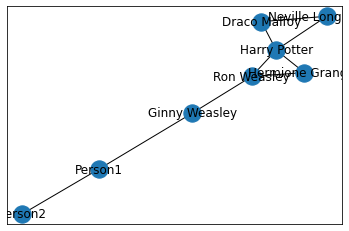

In [141]:
# change center by adding edge nodes

G.add_edge('Ginny Weasley', 'Person1')
G.add_edge('Person1', 'Person2')

periphery: ['Draco Malfoy', 'Neville Longbottom', 'Person2']
center: ['Ron Weasley', 'Ginny Weasley']


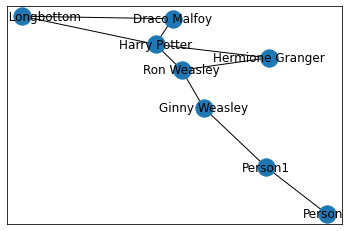

In [143]:
nx.draw_networkx(G, nx.spring_layout(G))
print('periphery:', nx.periphery(G))
print('center:', nx.center(G)) 